# 여러 머신러닝 알고리즘을 활용하자
- 여러 머신러닝 및 딥러닝 알고리즘을 활용하고 예측한다.
- 그리고 성능을 비교하여 본다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
data = pd.read_csv('../data/data01_train.csv')
data.drop('subject', axis=1, inplace=True)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


# 데이터 전처리

In [3]:
target = 'Activity'

X = data.drop(target, axis=1)
y = data.loc[:, target]

##### 스케일링

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

##### feature importance 중 선택된 feature 이름들

In [5]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


feature_cols_lists = ['tGravityAcc-min()-Y',
                     'tGravityAcc-mean()-Y',
                     'fBodyAcc-bandsEnergy()-1,8',
                     'tBodyAccJerk-energy()-X',
                     'tGravityAcc-arCoeff()-Z,4',
                     'angle(X,gravityMean)',
                     'fBodyAccMag-energy()',
                     'tGravityAccMag-arCoeff()1',
                     'tBodyAccMag-std()',
                     'tGravityAcc-min()-X',
                     'fBodyAccJerk-bandsEnergy()-17,24.2',
                     'tGravityAcc-max()-X',
                     'tBodyAcc-correlation()-X,Y',
                     'tGravityAcc-mean()-X',
                     'tBodyAccJerk-iqr()-Y',
                     'tGravityAccMag-std()',
                     'fBodyAccJerk-std()-X',
                     'fBodyAccMag-sma()',
                     'tGravityAcc-min()-Z',
                     'fBodyAccJerk-bandsEnergy()-1,24',
                     'fBodyAccMag-mad()',
                     'tGravityAcc-energy()-X',
                     'fBodyAccJerk-energy()-X',
                     'angle(Y,gravityMean)',
                     'tGravityAcc-max()-Y',
                     'tBodyAccJerk-sma()',
                     'tGravityAcc-arCoeff()-Z,2']

##### train, validation 분리하기

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

x_train_s = scaler.fit_transform(x_train)
x_valid_s = scaler.fit_transform(x_valid)

# 모델링

### 알고리즘 1

In [7]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=1000)

lg.fit(x_train_s, y_train)
lg.score(x_valid_s,y_valid)

0.9821580288870009

In [8]:
# feature importance 높은것만 뽑아서 돌림
newx_train_s = scaler.fit_transform(x_train[feature_cols_lists])
newx_valid_s = scaler.fit_transform(x_valid[feature_cols_lists])


lg = LogisticRegression(max_iter=1000)
lg.fit(newx_train_s, y_train)

lg.score(newx_valid_s,y_valid)

0.9473237043330501

### 알고리즘 2

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(x_train_s, y_train)
kn.score(x_valid_s, y_valid)

0.9566694987255735

In [10]:
# feature importance 높은것만 뽑아서 돌림
kn = KNeighborsClassifier()
kn.fit(newx_train_s, y_train)

kn.score(newx_valid_s, y_valid)

0.9583687340696686

### 알고리즘 3

In [11]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf.score(x_valid, y_valid)

0.9855564995751912

In [12]:
# feature importance 높은것만 뽑아서 돌림
rf = RandomForestClassifier()
rf.fit(x_train[feature_cols_lists], y_train)

rf.score(x_valid[feature_cols_lists], y_valid)

0.9745114698385726

### 알고리즘 4

In [13]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train_e, x_valid_e, y_train_e, y_valid_e = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xg = XGBClassifier()

xg.fit(x_train_e, y_train_e)
xg.score(x_valid_e, y_valid_e)

0.994052676295667

In [14]:
# feature importance 높은것만 뽑아서 돌림
xg = XGBClassifier()
xg.fit(x_train_e[feature_cols_lists], y_train_e)

xg.score(x_valid_e[feature_cols_lists], y_valid_e)

0.9796091758708582

### 알고리즘 5

In [15]:
from keras.layers import Dense
from keras import Sequential
import tensorflow as tf

In [16]:
x_train.shape, len(y_train.unique())

((4704, 561), 6)

In [17]:
model = Sequential()
model.add(Dense(256, input_shape=(x_train.shape[1],), activation='swish'))
model.add(Dense(128, activation='swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(len(set(y_train_e)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train_e, y_train_e, epochs=20, batch_size=32, validation_data=(x_valid_e, y_valid_e))

Epoch 1/20
147/147 [==============================] - 1s 7ms/step - loss: 0.0500 - accuracy: 0.9807 - val_loss: 0.0616 - val_accuracy: 0.9805
Epoch 2/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0447 - accuracy: 0.9830 - val_loss: 0.0524 - val_accuracy: 0.9813
Epoch 3/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0646 - accuracy: 0.9741 - val_loss: 0.0687 - val_accuracy: 0.9762
Epoch 4/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0580 - accuracy: 0.9802 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 5/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0499 - accuracy: 0.9815 - val_loss: 0.0744 - val_accuracy: 0.9677
Epoch 6/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0361 - accuracy: 0.9855 - val_loss: 0.0674 - val_accuracy: 0.9728
Epoch 7/20
147/147 [==============================] - 1s 6ms/step - loss: 0.0432 - accuracy: 0.9813 - val_loss: 0.0625 - val_accuracy: 0.9762
Epoch 

In [28]:
pred = model.predict(x_valid_e)
predicted_classes = np.argmax(pred, axis=1)

accuracy_score(y_valid_e, predicted_classes)

37/37 [==============================] - 0s 3ms/step


0.983857264231096

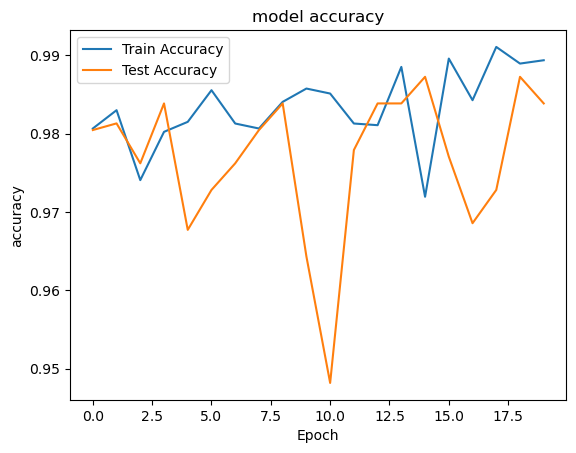

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

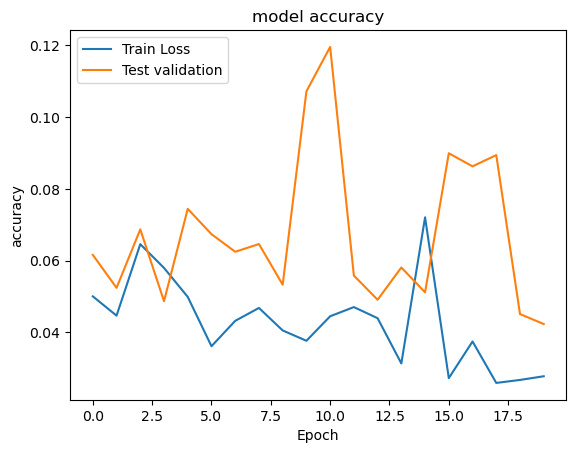

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test validation'], loc='upper left')
plt.show()